# Seasonal Flu Vaccination Prediction Analysis

In [182]:
# Pulling right packages

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,precision_score,recall_score
#plot_confusion_matrix, plot_roc_curve,

In [183]:
# Import the data files

df_features = pd.read_csv("data/training_set_features.csv")
df_labels = pd.read_csv("data/training_set_labels.csv")

In [184]:
# Check the shape of the two data files

print(df_features.shape)
print(df_labels.shape)

# There are same number of rows. So we can combines these two dataframes

(26707, 36)
(26707, 3)


In [185]:
# Checking the dataframe info

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [186]:
# Checking the dataframe info

df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [187]:
# We can join the two df as they have the same column 'respondent_id'

df_merged = df_features.merge(df_labels, how='inner', on='respondent_id')

In [188]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [189]:
# Checking out the merged data columns
pd.set_option('display.max_columns', 1000)
df_merged.head(20)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp,0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0


In [190]:
## White dominated dataset

df_merged['race'].value_counts()

race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64

In [191]:
df_merged['age_group'].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [192]:
df_merged['census_msa'].value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

In [193]:
df_merged['health_insurance'].value_counts()

health_insurance
1.0    12697
0.0     1736
Name: count, dtype: int64

In [194]:
## Write a rationale on why we are dropping these columns and dropping all NAN values

df_merged.drop(columns = ['hhs_geo_region', 'employment_industry', 'employment_occupation'], inplace = True)

In [195]:
df_master = df_merged.dropna()

In [196]:
df_master.to_csv("data/master_dataset.csv")

In [197]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11794 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                11794 non-null  int64  
 1   h1n1_concern                 11794 non-null  float64
 2   h1n1_knowledge               11794 non-null  float64
 3   behavioral_antiviral_meds    11794 non-null  float64
 4   behavioral_avoidance         11794 non-null  float64
 5   behavioral_face_mask         11794 non-null  float64
 6   behavioral_wash_hands        11794 non-null  float64
 7   behavioral_large_gatherings  11794 non-null  float64
 8   behavioral_outside_home      11794 non-null  float64
 9   behavioral_touch_face        11794 non-null  float64
 10  doctor_recc_h1n1             11794 non-null  float64
 11  doctor_recc_seasonal         11794 non-null  float64
 12  chronic_med_condition        11794 non-null  float64
 13  child_under_6_months 

<Axes: ylabel='h1n1_vaccine'>

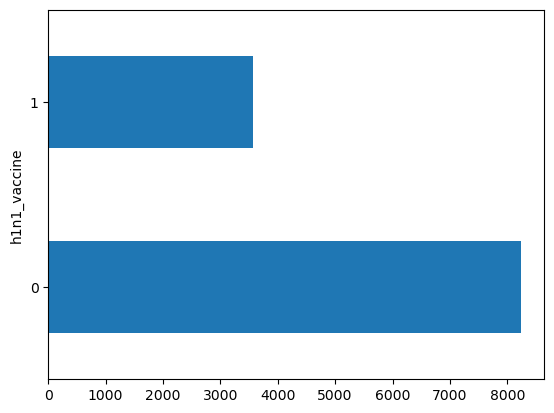

In [198]:
df_master['h1n1_vaccine'].value_counts().plot(kind = "barh")

<Axes: ylabel='seasonal_vaccine'>

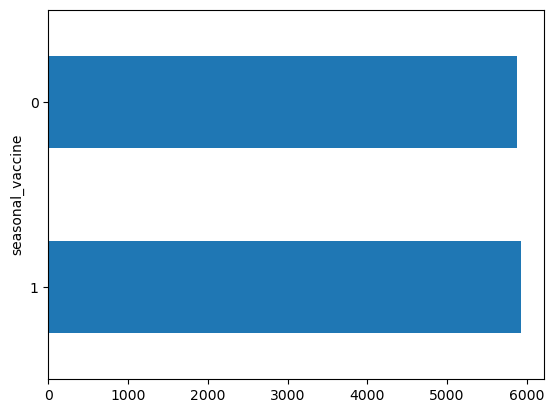

In [199]:
# We have balanced target dataset

df_master['seasonal_vaccine'].value_counts().plot(kind = "barh")

## Baseline Model for Seasonal Flu Vaccination

In [200]:
# Setting up for the baseline model

X_base = df_master[['doctor_recc_seasonal', 'health_insurance', 'opinion_seas_vacc_effective']]
y_base = df_master['seasonal_vaccine']

In [201]:
# Train Test Split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
                                                                        X_base, 
                                                                        y_base, 
                                                                        test_size = .2, 
                                                                        random_state=22)

In [202]:
scaler = StandardScaler()
X_train_base_sc = scaler.fit_transform(X_train_base)
X_test_base_sc = scaler.transform(X_test_base)

In [203]:
logreg = LogisticRegression(random_state = 7)
logreg.fit(X_train_base_sc, y_train_base)

LogisticRegression(random_state=7)

In [204]:
y_train_base_pred = logreg.predict(X_train_base_sc)
y_test_base_pred = logreg.predict(X_test_base_sc)

In [205]:
base_train_acc_score = accuracy_score(y_train_base, y_train_base_pred)
base_train_acc_score

0.749443561208267

In [206]:
base_test_acc_score = accuracy_score(y_test_base, y_test_base_pred)
base_test_acc_score

0.7579482831708351

## Model Improvement #1  (Anthony)  - all columns and all columns without H1N1

In [207]:
# Make sure there's no data leakage, if doing OHE - do it correctly, do cross-validation (train test split twice), 

## Model Improvement #2  (Sangwon)  - playing with LogReg funciton feature

## Model Improvement #3  (Ermiyas)  - using decision tree classifier to determine the columns to use

In [208]:
df_master.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0,0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,1,1


In [209]:
# Create data frame for numerical feature
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df_master.select_dtypes(include=numerics)
newdf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0,1,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0,0,0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,2.0,0.0,1,1


In [210]:
# Set X and y for numerical data frame
X_numeric = newdf.drop(columns = ['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis = 1)
y_numeric = newdf['seasonal_vaccine']

In [211]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Call feature_name used 
feature_used = X_numeric.columns
# Intiate and fit DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_numeric, y_numeric)
# Using dt.feature_importances_ paramter evaluate the feature importance for each columns
for fi, feature in zip(dt.feature_importances_, feature_used):
    print(fi, feature)

0.05494271384276867 h1n1_concern
0.03885781358764464 h1n1_knowledge
0.011009866312670672 behavioral_antiviral_meds
0.024208789279890112 behavioral_avoidance
0.009451771108887333 behavioral_face_mask
0.02362322884513217 behavioral_wash_hands
0.026312024655641652 behavioral_large_gatherings
0.02188279567822941 behavioral_outside_home
0.024926928908334586 behavioral_touch_face
0.0195102816506492 doctor_recc_h1n1
0.08684407414141383 doctor_recc_seasonal
0.02324122615631059 chronic_med_condition
0.014026231705750928 child_under_6_months
0.018525661101232167 health_worker
0.02694910920279412 health_insurance
0.056488766122132474 opinion_h1n1_vacc_effective
0.04849610982146899 opinion_h1n1_risk
0.051600964716325505 opinion_h1n1_sick_from_vacc
0.08200147119906105 opinion_seas_vacc_effective
0.2009685898749977 opinion_seas_risk
0.04177034006120891 opinion_seas_sick_from_vacc
0.053277189273957505 household_adults
0.04108405275349789 household_children


In [212]:
# Create catagorical dataframe which has a dtype of object
catagorical = df_master[['age_group','education','race','sex','income_poverty','marital_status','rent_or_own',
              'employment_status','census_msa']]

In [213]:
# Transform the catagorical dataframe using OneHotEncoder
ohe = OneHotEncoder(drop='first')
ohe.fit(catagorical)
catagorical_encoded = pd.DataFrame(ohe.transform(catagorical).todense(),
                               columns=ohe.get_feature_names_out(),index=catagorical.index)
catagorical_encoded

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26697,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26699,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26701,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
26703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [214]:
# Add together the numerical dataframe with the transformed catagorical dataframe 
df_total = pd.concat([newdf,catagorical_encoded],axis = 1)

In [215]:
df_total.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,2.0,0.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [216]:
# Drop null values if it exist
df_total.dropna(inplace = True)

In [217]:
# Set X and y for all features
X_all = df_total.drop(columns = ['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis = 1)
y_all= df_total['seasonal_vaccine']

In [218]:
# Using decision tree to identify feature importance for both numerical and transformed catagorical dataframe
# Call feature_name used 
feature_used = X_all.columns
# Intiate and fit DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_all, y_all)
# Using dt.feature_importances_ paramter evaluate the feature importance for each columns
for fi, feature in zip(dt.feature_importances_, feature_used):
    print(fi, feature)

0.028523268250084284 h1n1_concern
0.025860182369390396 h1n1_knowledge
0.006459135496663014 behavioral_antiviral_meds
0.012222947221596895 behavioral_avoidance
0.005153407030413498 behavioral_face_mask
0.011579488350361418 behavioral_wash_hands
0.016223883296817072 behavioral_large_gatherings
0.010931979789331256 behavioral_outside_home
0.018642405084137923 behavioral_touch_face
0.014406118053111896 doctor_recc_h1n1
0.08566325064974975 doctor_recc_seasonal
0.014938369990665078 chronic_med_condition
0.01116586427783513 child_under_6_months
0.014051419045278285 health_worker
0.02163116590517344 health_insurance
0.03625683898328437 opinion_h1n1_vacc_effective
0.03270458345989977 opinion_h1n1_risk
0.031168026758001403 opinion_h1n1_sick_from_vacc
0.07556716815299289 opinion_seas_vacc_effective
0.19671600515305915 opinion_seas_risk
0.03308751802888115 opinion_seas_sick_from_vacc
0.02658369139944993 household_adults
0.028294481783550915 household_children
0.006661078913678061 age_group_35 - 44

In [219]:
# Use 5 feature from the desicion tree results above 
X_feature = df_total[['doctor_recc_seasonal','opinion_seas_risk','opinion_h1n1_vacc_effective',
                   'opinion_seas_sick_from_vacc','opinion_seas_vacc_effective']]
y_feature = df_total['seasonal_vaccine']

In [220]:
# Train Test Split
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(
                                                                        X_feature, 
                                                                        y_feature, 
                                                                        test_size = .2, 
                                                                        random_state=22)

In [221]:
# Apply standard scaler 
scaler_ft = StandardScaler()
scaler_ft.fit(X_train_feature)
X_train_ft_sc = scaler_ft.transform(X_train_feature)
X_test_ft_sc = scaler_ft.transform(X_test_feature)

In [222]:
# Initiate and fit the logistic regression
logreg_ft = LogisticRegression(random_state = 1)
logreg_ft.fit(X_train_ft_sc, y_train_feature)

LogisticRegression(random_state=1)

In [223]:
y_pred_log_ft_test = logreg_ft.predict(X_test_ft_sc)
y_pred_log_ft_train = logreg_ft.predict(X_train_ft_sc)

In [224]:
feature_train_acc_score = accuracy_score(y_train_feature, y_pred_log_ft_train)
feature_test_acc_score = accuracy_score(y_test_feature, y_pred_log_ft_test)
feature_train_pre_score = precision_score(y_train_feature, y_pred_log_ft_train)
feature_test_pre_score = precision_score(y_test_feature, y_pred_log_ft_test)
feature_train_recall_score = recall_score(y_train_feature, y_pred_log_ft_train)
feature_test_recall_score = recall_score(y_test_feature, y_pred_log_ft_test)

In [225]:
print("Accuracy Score for Train Data:   ", feature_train_acc_score)
print("Accuracy Score for Test Data:    ", feature_test_acc_score)
print("Precision Score for Train Data:  ", feature_train_pre_score)
print("Precision Score for Test Data:   ", feature_test_pre_score)
print("Recall Score for Train Data:     ", feature_train_recall_score)
print("Recall Score for Test Data:      ", feature_test_recall_score)

Accuracy Score for Train Data:    0.7595124536301007
Accuracy Score for Test Data:     0.7643069097075031
Precision Score for Train Data:   0.7725274725274726
Precision Score for Test Data:    0.7654639175257731
Recall Score for Train Data:      0.7401558222783744
Recall Score for Test Data:       0.7589437819420783


In [226]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_feature, y_pred_log_ft_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7642820175533176

In [228]:
logreg_ft.coef_

array([[ 0.71778681,  0.85549631,  0.01299495, -0.37203725,  0.66360806]])

In [229]:
logreg.intercept_

array([-0.02615912])

In [46]:
confusion_matrix(y_test_feature,y_pred_log_ft_test)

array([[896, 289],
       [282, 892]], dtype=int64)

In [ ]:
plot_confusion_matrix(dt, X_test_feature, y_test_feature);

In [47]:
plot_roc_curve(dt, X_test_dt, y_test_feature);

NameError: name 'plot_roc_curve' is not defined

In [48]:
# Decision Tree model using all features
X_dt = df_total.drop(columns = ['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis = 1)
y_dt = df_total['seasonal_vaccine']

In [49]:
# Train Test Split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
                                                                        X_dt, 
                                                                        y_dt, 
                                                                        test_size = .2, 
                                                                        random_state=22)

In [50]:
# Initiate and fit DecisionTreeClassifier
dt = DecisionTreeClassifier(
                            max_depth = 4, random_state=1)
dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [51]:
# Decisiion tree prediction for test and train
y_pred_dt_test = dt.predict(X_test_dt)
y_pred_dt_train = dt.predict(X_train_dt)

In [52]:
# Evaluating decision tree model metrics using Sklearn
dt_train_acc_score = accuracy_score(y_train_dt, y_pred_dt_train)
dt_test_acc_score = accuracy_score(y_test_dt, y_pred_dt_test)
dt_train_pre_score = precision_score(y_train_dt, y_pred_dt_train)
dt_test_pre_score = precision_score(y_test_dt, y_pred_dt_test)
dt_train_recall_score = recall_score(y_train_dt, y_pred_dt_train)
dt_test_recall_score = recall_score(y_test_dt, y_pred_dt_test)

In [53]:
# Print the metrics
print("Accuracy Score for Train Data:   ", feature_train_acc_score)
print("Accuracy Score for Test Data:    ", feature_test_acc_score)
print("Precision Score for Train Data:  ", feature_train_pre_score)
print("Precision Score for Test Data:   ", feature_test_pre_score)
print("Recall Score for Train Data:     ", feature_train_recall_score)
print("Recall Score for Test Data:      ", feature_test_recall_score)

Accuracy Score for Train Data:    0.7629040805511393
Accuracy Score for Test Data:     0.7579482831708351
Precision Score for Train Data:   0.7568382511307344
Precision Score for Test Data:    0.7552921253175275
Recall Score for Train Data:      0.7399452516319225
Recall Score for Test Data:       0.7597955706984668


In [54]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_dt, y_pred_dt_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7785421114297832

In [55]:
confusion_matrix(y_test_dt,y_pred_dt_test)

array([[860, 325],
       [198, 976]], dtype=int64)

In [56]:
plot_confusion_matrix(dt, X_test_dt, y_test_dt);

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
plot_roc_curve(dt, X_test_dt, y_test_dt);

<Axes: ylabel='h1n1_vaccine'>

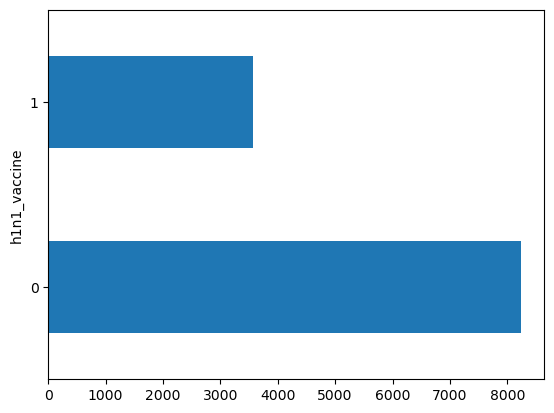

In [57]:
# The second target is H1N1 which has class imbalance 
df_master['h1n1_vaccine'].value_counts().plot(kind = "barh")

In [103]:
# let us use smote to over sample the minorty
# import the necessary library
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [104]:
# set X and y for smote model
X_sm = df_total.drop(columns = ['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis = 1)
y_sm = df_total['h1n1_vaccine']

In [105]:
# Train Test Split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
                                                                        X_sm, 
                                                                        y_sm, 
                                                                        test_size = .2, 
                                                                        random_state=22)

In [106]:
# define the pipeline
smote = SMOTE(sampling_strategy = 'minority')

In [108]:
# Transform dataset
X_tr_sm ,y_tr_sm = smote.fit_resample(X_train_sm,y_train_sm)
X_ts_sm ,y_ts_sm = smote.fit_resample(X_test_sm,y_test_sm)

In [109]:
dt_sm = DecisionTreeClassifier(
                            max_depth = 4, random_state=1)
dt_sm.fit(X_tr_sm, y_tr_sm)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [110]:
y_pred_sm_test = dt_sm.predict(X_ts_sm)
y_pred_sm_train = dt_sm.predict(X_tr_sm)

In [115]:
sm_train_acc_score = accuracy_score(y_train_sm, y_pred_dt_train)
sm_test_acc_score = accuracy_score(y_ts_sm, y_pred_sm_test)
sm_train_pre_score = precision_score(y_train_sm, y_pred_dt_train)
sm_test_pre_score = precision_score(y_ts_sm, y_pred_sm_test)
sm_train_recall_score = recall_score(y_train_sm, y_pred_dt_train)
sm_test_recall_score = recall_score(y_ts_sm, y_pred_sm_test)

In [116]:
print("Accuracy Score for Train Data:   ", sm_train_acc_score)
print("Accuracy Score for Test Data:    ", sm_test_acc_score)
print("Precision Score for Train Data:  ", sm_train_pre_score)
print("Precision Score for Test Data:   ", sm_test_pre_score)
print("Recall Score for Train Data:     ", sm_train_recall_score)
print("Recall Score for Test Data:      ", sm_test_recall_score)

Accuracy Score for Train Data:    0.632114467408585
Accuracy Score for Test Data:     0.8010423053341508
Precision Score for Train Data:   0.43771964076532605
Precision Score for Test Data:    0.8487215909090909
Recall Score for Train Data:      0.7913872220261208
Recall Score for Test Data:       0.7326793378295524
